In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
import seaborn as sns

pwd = !pwd

In [4]:
matches = pd.read_csv(pwd[0][:-8]+'/stats/matchdata.csv')
events = pd.read_csv(pwd[0][:-8]+'/stats/events.csv')
ts = pd.read_csv(pwd[0][:-8]+'/stats/timeseries.csv')
wrestlers = pd.read_csv(pwd[0][:-8]+'/stats/wrestlers.csv')
wrestlers.head()

,name,rating,team_id
0,Robert Rehm,968,USA
1,Paul Glynn,984,USA
2,Blaize Cabell,959,USA
3,Ben Whitford,1038,USA
4,Johnni DiJulius,993,USA


In [5]:
# calculates effective wins and assigns row-wise
for person in matches.focus_id.unique():
    group = matches[matches['focus_id']==person]
    ew = group.num_result.mean() * len(group.index)
    for i, row in wrestlers.iterrows():
        if row['name'] == person:
            wrestlers.at[i, 'ew'] = round(ew, 2)

In [6]:
wrestlers.sort_values('ew', ascending=False).head()

,name,rating,team_id,ew
332,Jason Nolf,1130,USA,15.45
312,Nathan Jackson,1108,USA,14.75
109,Tyler Graff,1160,USA,14.65
98,Garrett Ryan,1105,USA,14.50
213,Jaydin Eierman,1105,USA,14.05


# Start here

In [7]:
# sample for a singluar athlete report page
print('Be sure to follow spelling as seen on the official site.')
athlete = input('Enter wrestler: ')
fm = matches[matches.focus_id==athlete]

Be sure to follow spelling as seen on the official site.
Enter wrestler: Jason Ness


In [8]:
fm.result.values

array(['LossD', 'LossTF', 'WinF', 'WinD', 'LossTF', 'WinF', 'WinF',
       'WinTF', 'WinF'], dtype=object)

In [9]:
def find_result_types(row):
    if row == 'WinF':
        return 'Fall'
    elif row == 'WinTF':
        return 'Tech'
    elif row == 'WinD':
        return 'Decision'
    elif row == 'LossD':
        return 'Decision'
    elif row == 'LossTF':
        return 'Tech'
    elif row == 'LossF':
        return 'Fall'



fm['binary_result'] = ['Win' if row > 1 else 'Loss' for row in fm.num_result.values]
fm['binary_result']

fm['result_type'] = [find_result_types(row) for row in fm.result.values]
fm['result_type']

/home/nanthony007/VeritasAnalytics-Website/venv/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nanthony007/VeritasAnalytics-Website/venv/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3       Decision
208         Tech
209         Fall
243     Decision
255         Tech
1254        Fall
1283        Fall
1321        Tech
1347        Fall
Name: result_type, dtype: object

In [10]:
fm = fm[fm.duration != 0]


In [11]:
fm[fm['binary_result']=='Win']

,apm,d_rate,da,date,dc2,dc4,duration,exposure,focus_id,focus_score,...,tc2,tc4,turn,violation,vs,weight,passive_dif,num_result,binary_result,result_type
243,17.0,50.0,2,2019-05-17,1,0,360.27,0,Jason Ness,6,...,0,1,0,0,31.58,65,0,1.10,Win,Decision
1254,3.0,0.0,0,2019-04-26,0,0,60.20,1,Jason Ness,2,...,0,0,0,0,17.89,65,-1,1.75,Win,Fall
1283,18.0,50.0,2,2019-04-26,1,0,270.59,1,Jason Ness,9,...,0,0,0,0,41.30,65,0,1.75,Win,Fall
1321,28.0,0.0,1,2019-04-26,0,0,264.58,0,Jason Ness,15,...,0,2,0,0,63.50,65,0,1.50,Win,Tech
1347,9.0,0.0,0,2019-04-26,0,0,102.80,0,Jason Ness,6,...,0,1,0,0,31.19,65,0,1.75,Win,Fall


<Figure size 432x288 with 0 Axes>

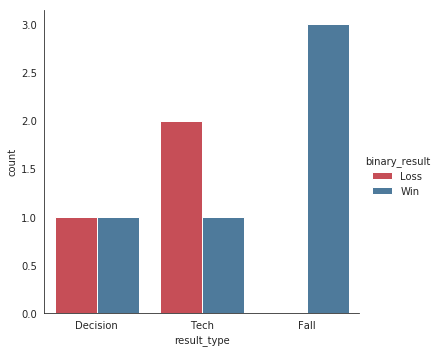

In [14]:
sns.set_style('white')
sns.despine()

sns.catplot(x='result_type', hue='binary_result', kind='count', data=fm, 
            palette=sns.diverging_palette(10, 240, n=2))
plt.show()

  binary_result variable  value
0          Loss      npf   0.71
1          Loss      npf   0.40
2           Win      npf   1.07
3          Loss      npf   0.67
4           Win      npf   0.00
5           Win      npf   1.25
6           Win      npf   1.79
7           Win      npf   1.75


<Figure size 432x288 with 0 Axes>

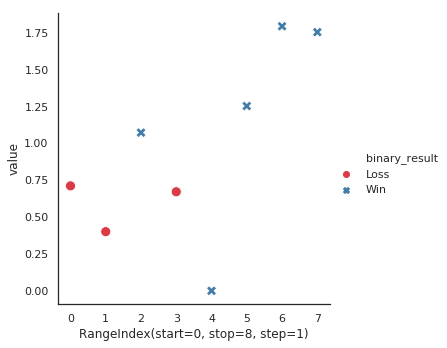

In [220]:
sns.set_style('white')
sns.despine()

fm2 = pd.melt(fm, id_vars=['binary_result'], value_vars=['npf'])
print(fm2)

sns.relplot(data=fm2, x=fm2.index, y='value',
            hue='binary_result', style='binary_result',
            s=100,palette=sns.diverging_palette(10, 240, n=2))


In [141]:
fm.ls_rate.values

array([ 0.,  0.,  0.,  0.,  0.,  0., 50., 40.,  0.])

In [230]:
labels = ['hi_rate', 'ho_rate', 'd_rate', 'ls_rate', 'gb_rate', 't_rate']
         #'opp_hi_rate', 'opp_ho_rate', 'opp_d_rate', 'opp_ls_rate', 'opp_gb_rate', 'opp_t_rate']

fm2 = pd.melt(fm, id_vars='binary_result', value_vars=labels)
fm2

,binary_result,variable,value
0,Loss,hi_rate,0.0
1,Loss,hi_rate,0.0
2,Win,hi_rate,0.0
3,Loss,hi_rate,0.0
4,Win,hi_rate,0.0
5,Win,hi_rate,0.0
6,Win,hi_rate,0.0
7,Win,hi_rate,100.0
8,Loss,ho_rate,0.0
9,Loss,ho_rate,0.0


<Figure size 432x288 with 0 Axes>

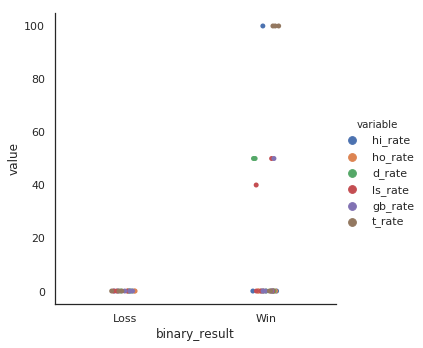

In [231]:
sns.set_style('white')
sns.despine()

sns.catplot(data=fm2, x='binary_result', y='value', hue='variable')

In [89]:
fm

,apm,d_rate,da,date,dc2,dc4,duration,exposure,focus_id,focus_score,...,tc2,tc4,turn,violation,vs,weight,passive_dif,num_result,binary_result,result_type
51,16.0,0.00,2,2019-05-17,0,0,06:00:86,2,Zain Retherford,7,...,0,0,0,0,15.15,65,-1,1.1,Win,Decision
61,11.0,0.00,0,2019-05-17,0,0,06:02:28,0,Zain Retherford,7,...,0,0,0,0,22.63,65,-1,1.1,Win,Decision
246,17.0,100.00,2,2019-05-17,2,0,02:39:34,0,Zain Retherford,10,...,0,0,0,0,34.64,65,0,1.5,Win,Tech
268,9.0,100.00,1,2019-05-17,1,0,06:00:45,0,Zain Retherford,6,...,0,0,0,1,10.64,65,0,1.1,Win,Decision
1203,12.0,0.00,0,2019-04-26,0,0,00:25:22,0,Zain Retherford,10,...,0,0,0,0,30.50,65,0,1.5,Win,Tech
1245,19.0,33.33,3,2019-04-26,1,0,06:00:41,1,Zain Retherford,11,...,0,0,0,1,46.10,65,0,1.1,Win,Decision
1258,14.0,0.00,1,2019-04-26,0,0,06:00:89,0,Zain Retherford,4,...,0,0,1,0,18.55,65,0,0.9,Loss,Decision
1268,13.0,0.00,0,2019-04-26,0,0,01:55:39,0,Zain Retherford,10,...,0,0,2,0,38.98,65,0,1.5,Win,Tech
1275,16.0,100.00,1,2019-04-26,1,0,04:16:02,0,Zain Retherford,10,...,0,0,0,0,39.22,65,0,1.5,Win,Tech


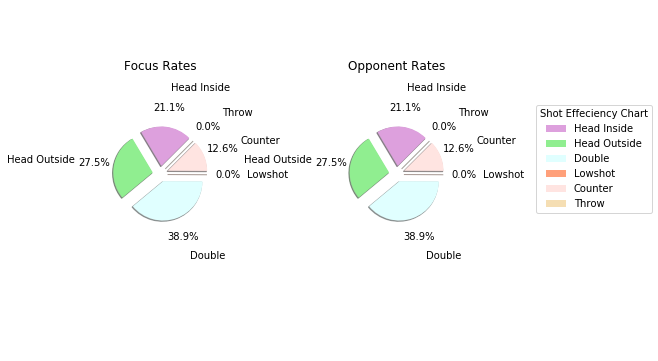

In [184]:
# shot chart
labels = ['Head Inside', 'Head Outside', 'Double', 'Lowshot', 'Counter', 'Throw']
colors = ['plum', 'lightgreen', 'lightcyan', 'lightsalmon', 'mistyrose', 'wheat']
rates = [fm.hi_rate.mean(), fm.ho_rate.mean(), fm.d_rate.mean(), fm.ls_rate.mean(), fm.gb_rate.mean(), fm.t_rate.mean()]
opp_rates = [fm.opp_hi_rate.mean(), fm.opp_ho_rate.mean(), fm.opp_d_rate.mean(), fm.opp_ls_rate.mean(), fm.gb_rate.mean(), fm.opp_t_rate.mean()]
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2)  # only "explode" the 2nd slice 

# Make figure and axes
fig, axs = plt.subplots(1, 3)

# A standard pie plot
axs[0].pie(rates, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=45,
          pctdistance=1.5, labeldistance=2.0, colors=colors)
axs[0].set_title('Focus Rates', y=1.5)
axs[1].axis('off')
axs[2].pie(rates, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=45,
          pctdistance=1.5, labeldistance=2.0, colors=colors)
axs[2].set_title('Opponent Rates', y=1.5)
axs[2].legend(axs,labels=labels,
          title="Shot Effeciency Chart",
          loc='upper center',bbox_to_anchor=(2.5, 1.25), ncol=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [30]:
fm.columns

Index(['apm', 'd_rate', 'da', 'date', 'dc2', 'dc4', 'duration', 'exposure',
       'focus_id', 'focus_score', 'focus_team_id', 'gb_rate', 'gba', 'gbc2',
       'gut', 'hi_rate', 'hia', 'hic2', 'hic4', 'ho_rate', 'hoa', 'hoc2',
       'hoc4', 'leg_lace', 'ls_rate', 'lsa', 'lsc2', 'lsc4', 'matchID', 'mov',
       'npf', 'opp_apm', 'opp_d_rate', 'opp_da', 'opp_dc2', 'opp_dc4',
       'opp_exposure', 'opp_gb_rate', 'opp_gba', 'opp_gbc2', 'opp_gbc4',
       'opp_gut', 'opp_hi_rate', 'opp_hia', 'opp_hic2', 'opp_hic4',
       'opp_ho_rate', 'opp_hoa', 'opp_hoc2', 'opp_hoc4', 'opp_leg_lace',
       'opp_ls_rate', 'opp_lsa', 'opp_lsc2', 'opp_lsc4', 'opp_npf',
       'opp_passive', 'opp_pushout', 'opp_recovery', 'opp_score', 'opp_t_rate',
       'opp_ta', 'opp_tc2', 'opp_tc4', 'opp_team_id', 'opp_turn',
       'opp_violation', 'opp_vs', 'opponent_id', 'passive', 'pushout',
       'recovery', 'result', 't_rate', 'ta', 'tc2', 'tc4', 'turn', 'violation',
       'vs', 'weight', 'passive_dif', 'num_r

In [38]:
fm_top = fm.corrwith(fm['num_result']).dropna()
fm_top.sort_values(ascending=False)[1:4]

mov            0.887022
npf            0.774106
focus_score    0.766267
dtype: float64

In [57]:
fm_bottom = fm.corrwith(fm['num_result']).dropna()
fm_bottom = fm_bottom.sort_values(ascending=False)[-3:]
z = zip(fm_bottom.index.values, fm_bottom.values)
for x, y in z:
    print(x,y)

lsa -0.8112786678590019
opp_score -0.848365005991527
opp_apm -0.9653633930282666


In [56]:
fm_bottom.index.values

array(['lsa', 'opp_score', 'opp_apm'], dtype=object)

In [65]:
fm_bottom.to_frame()

,0
lsa,-0.811279
opp_score,-0.848365
opp_apm,-0.965363
